In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('WCD.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [ ]:
dataset = pd.read_csv('WCD.csv')
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
x = dataset.iloc[:, [3, 4]].values


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

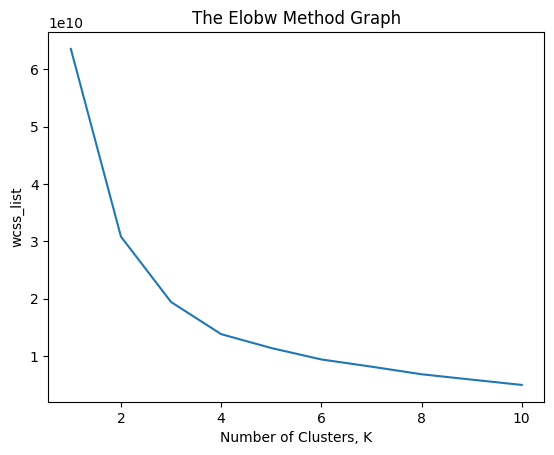

In [ ]:
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elobw Method Graph')
mtp.xlabel('Number of Clusters, K')
mtp.ylabel('wcss_list')
mtp.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


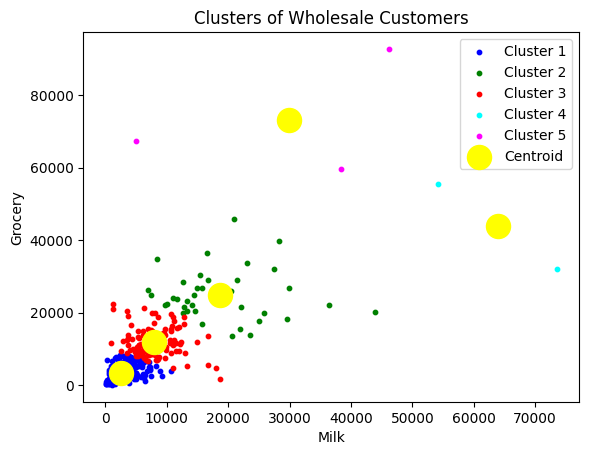

In [ ]:
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 10, c = 'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 10, c = 'green', label = 'Cluster 2') #for second cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 10, c = 'red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5') #for fifth cluster
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of Wholesale Customers')
mtp.xlabel('Milk')
mtp.ylabel('Grocery')
mtp.legend()
mtp.show()